<a href="https://colab.research.google.com/github/Deleon57/EDAR-Data/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import datetime as dt
import pandas as pd
from pandas_datareader import data as pdr
from google.colab import files
import yfinance as yf

In [6]:
stocklist = ['GFI', 'FSR']
stocks = [i + '.JO' for i in stocklist]
stocks

['GFI.JO', 'FSR.JO']

In [7]:
start = "2013-03-01"
end = "2024-02-28"


df = yf.download(['GFI.JO', 'FSR.JO'], start=start, end=end)

df.head()

/tmp/ipython-input-2495352864.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(['GFI.JO', 'FSR.JO'], start=start, end=end)
[*********************100%***********************]  2 of 2 completed


Price             Close                      High                       Low  \
Ticker           FSR.JO       GFI.JO       FSR.JO       GFI.JO       FSR.JO   
Date                                                                          
2013-03-01  3121.473633  7431.279297  3132.408732  7503.098372  3062.821740   
2013-03-04  3064.810791  7250.467773  3126.445001  7385.142120  3032.005486   
2013-03-05  3201.002197  7257.449707  3201.002197  7283.386984  3083.698390   
2013-03-06  3107.556641  6928.245117  3220.884042  7299.347663  3105.568441   
2013-03-07  3114.515137  7453.974609  3156.267335  7503.853990  3095.627238   

Price                           Open                 Volume            
Ticker           GFI.JO       FSR.JO       GFI.JO    FSR.JO    GFI.JO  
Date                                                                   
2013-03-01  7338.512992  3084.691937  7465.193860  12379894   5930842  
2013-03-04  7250.467773  3126.445001  7370.178304  14174847   4128626  
2013-03-05  7217.546203  3100.598091  7262.437645  16391688   5666832  
2013-03-06  6928.245117  3202.990242  7258.446576  18189945   6130247  
2013-03-07  7237.498098  3132.408936  7282.389541  18272095  10489933

In [8]:
Close = df['Close']
Close.head()

Ticker,FSR.JO,GFI.JO
Date,,
2013-03-01,3121.473633,7431.279297
2013-03-04,3064.810791,7250.467773
2013-03-05,3201.002197,7257.449707
2013-03-06,3107.556641,6928.245117
2013-03-07,3114.515137,7453.974609


In [9]:
gfi_close = Close['GFI.JO']

# Create a target variable (1 for price increase, 0 for price decrease)
gfi_close = pd.DataFrame(gfi_close)
gfi_close['Target'] = (gfi_close['GFI.JO'].shift(-1) > gfi_close['GFI.JO']).astype(int)
gfi_close.dropna(inplace=True)

display(gfi_close.head())

,GFI.JO,Target
Date,,
2013-03-01,7431.279297,0
2013-03-04,7250.467773,1
2013-03-05,7257.449707,0
2013-03-06,6928.245117,1
2013-03-07,7453.974609,0


In [10]:
X = gfi_close[['GFI.JO']]
y = gfi_close['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 2237
Testing set size: 560


In [11]:
# Initialize the SVM model
svm_model = SVC(kernel='linear') # You can experiment with different kernels like 'rbf', 'poly', etc.

# Train the model
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [12]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the SVM model: {accuracy:.2f}")

Accuracy of the SVM model: 0.52


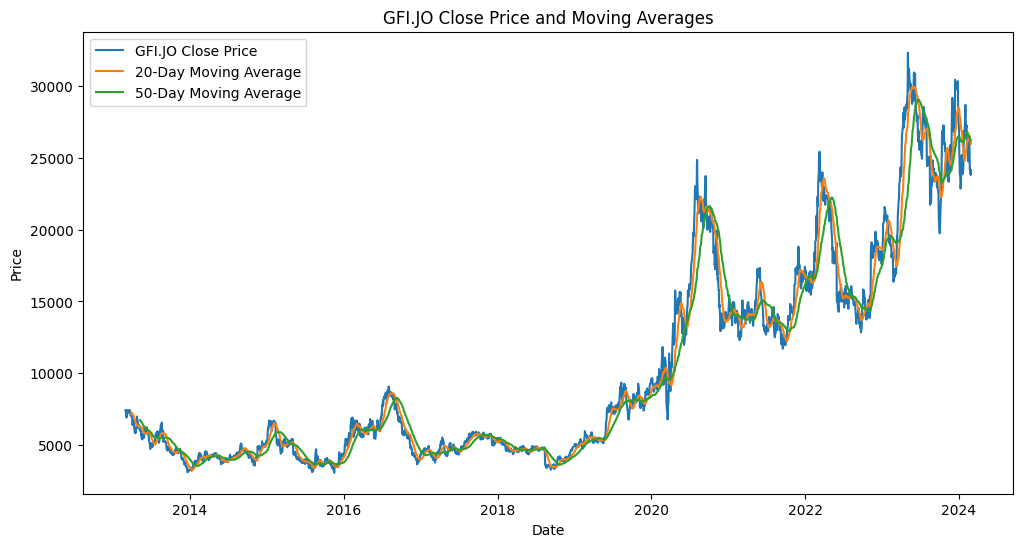

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(gfi_close['GFI.JO'], label='GFI.JO Close Price')
plt.plot(gfi_close['MA20'], label='20-Day Moving Average')
plt.plot(gfi_close['MA50'], label='50-Day Moving Average')
plt.title('GFI.JO Close Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [15]:
# Drop rows with NaN values created by moving averages
gfi_close.dropna(inplace=True)

X = gfi_close[['GFI.JO', 'MA20', 'MA50']]
y = gfi_close['Target']

display(gfi_close.head())

,GFI.JO,Target,MA20,MA50
Date,,,,
2013-05-09,6248.888184,0,6274.876074,6751.259014
2013-05-10,5995.500977,1,6267.244482,6722.543447
2013-05-13,6011.463867,0,6274.427173,6697.763369
2013-05-14,5980.537598,0,6277.170508,6672.225127
2013-05-15,5718.172363,1,6264.800366,6648.023672


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 2198
Testing set size: 550


In [17]:
# Initialize a new SVM model
svm_model_ma = SVC(kernel='linear')

# Train the model with moving averages as features
svm_model_ma.fit(X_train, y_train)

SVC(kernel='linear')

In [18]:
# Make predictions on the test set
y_pred_ma = svm_model_ma.predict(X_test)

# Evaluate the model
accuracy_ma = accuracy_score(y_test, y_pred_ma)
print(f"Accuracy of the SVM model with moving averages: {accuracy_ma:.2f}")

Accuracy of the SVM model with moving averages: 0.51


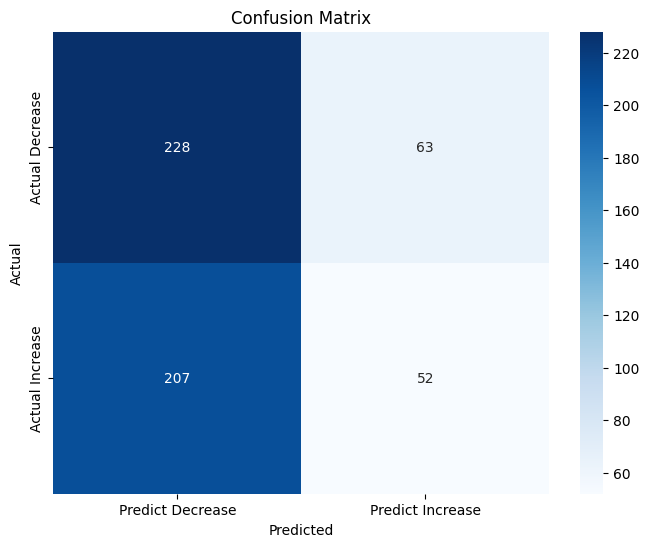

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_ma)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predict Decrease', 'Predict Increase'], yticklabels=['Actual Decrease', 'Actual Increase'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()